In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
from math import factorial as fct
from pprobs.distribution import Joint

In [5]:
def comb(n, k):
    if k > n:
        return 0
    if k <= 0:
        return 1
    return fct(n) // (fct(k) * fct(n-k)) 

In [6]:
def prob(g, b):
    if b+g > 3:
        return 0
    if b > 3 or g > 2:
        return 0
    return (comb(3, b) * comb(2, g) * comb(4, 3 - b - g)) / comb(9, 3)

dist = Joint(prob, range(0, 5), range(0, 5))
dist.probability_table()

,Y=0,Y=1,Y=2,Y=3,Y=4
X=0,0.047619,0.214286,0.142857,0.011905,0
X=1,0.142857,0.285714,0.071429,0.000000,0
X=2,0.047619,0.035714,0.000000,0.000000,0
X=3,0.000000,0.000000,0.000000,0.000000,0
X=4,0.000000,0.000000,0.000000,0.000000,0


In [7]:
print(dist.get_prob(2, range(0, 5)))
print(dist.get_prob(range(0, 5), range(0, 5)))

0.08333333333333333
0.9999999999999999


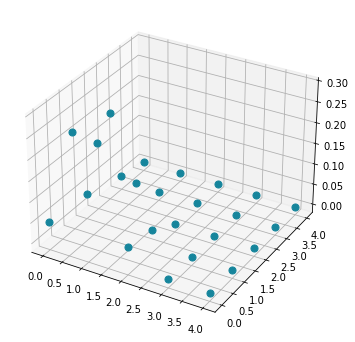

In [8]:
# 3-D Plot

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

for x in range(5):
    for y in range(5):
        z = prob(x, y)
        ax.scatter(x, y, z, marker='o', s=50, c='#16859c')

plt.show()

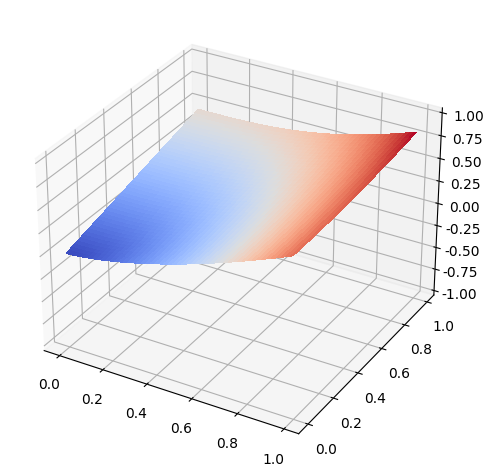

In [10]:
# plot 2
from matplotlib import cm
from matplotlib.ticker import LinearLocator

def pdf(x, y):
    return np.sqrt(x ** 3 / 2 + y ** 2 / 5)

dist = Joint(pdf, [0, 1], [0, 1], discrete=False)


fig = plt.figure(figsize=(6, 6), dpi=100)
ax = fig.add_subplot(projection='3d')

X = np.arange(0, 1, 0.01)
Y = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt((X**3) / 2 + (Y**2) / 5)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_formatter('{x:.02f}')

plt.show()

In [13]:
def prob(g, b):
    if b+g > 3:
        return 0
    if b > 3 or g > 2:
        return 0
    return (comb(3, b) * comb(2, g) * comb(4, 3-b-g)) / comb(9, 3)

dist = Joint(prob, range(0, 5), range(0, 5))

print(round(dist.get_prob(2, range(0, 5)), 3))
print(round(dist.get_prob(range(0, 5), range(0, 5)), 3))

0.083
1.0


In [14]:
from pprobs.simulation import Simulator

In [15]:
sim = Simulator()

sim.add_event('A', 0.3)
sim.add_event('B', 0.2)
sim.add_event('A^B', 0.3)
print(sim.get_prob('A+B'))

0.2
